In [1]:
# Stability analysis of n-forest system
# requires rule for jacobian for fixed-point analysis
using Random
using PyPlot
using ChaosTools
using DrWatson
using UnPack
# @quickactivate :CSSim
include(joinpath(srcdir(), "n_forest.jl"))
include(joinpath(scriptsdir(), "plots.jl"))

phase_portrait

In [2]:
?n_forest_jacob!

search: n_forest_jacob! n_forest_sym_jacob



```
n_forest_jacob!(J, u::Matrix, params::Dict{Symbol, Any}, t)
```

Create Jacobian `J` of an `n`-forest system in place using the state matrix `u`.

The state matrix `u` is `(n, 2)`. The rule for the Jacobian was determined  by visual inspection of the outputs of [`n_forest_sym_jacob`](@ref).

# Examples

```jldoctest
julia> # Test jacobian for one forest system
julia> n = 1;
julia> params = Dict(
    :ρ => 1, :f => 1, :a₁ => 1, :h => 1, :a₂ => 1, 
    :d => [], :l => 1, :α₀ => 1, :w₀ => 1, :P₀ => 1, 
    :β₁ => 1, :β₂ => 1, :ecosystems_to_deforest => [], 
    :n => n);
julia> J = zeros(n*2, n*2);
julia> u = ones(n, 2);
julia> n_forest_jacob!(J, u, params, 1);
julia> J
2×2 Matrix{Float64}:
 -2.0   1.0
  1.0  -1.0
julia> # Test jacobian for two forest system
julia> n = 2
julia> params[:n] = n
julia> params[:d] = [1]
julia> J = zeros(n*2, n*2);
julia> u = ones(n, 2);
julia> n_forest_jacob!(J, u, params, 1);
julia> J
4×4 Matrix{Float64}:
 -2.0   1.0   0.0       0.0
  1.0  -1.0   0.0       0.0
  0.0   0.0  -1.73576   1.0
  0.0   0.0   1.0      -0.735759
```


In [3]:
?phase_portrait

search: phase_portrait



```
phase_portrait(
    T::Int, 
    params::Dict{Symbol,Any}, 
    fixed_points::Bool,
    n_points::Int = 25,
    max_density::Float64 = 4.0; 
    nrows::Int = 0,
    ncols::Int = 0,
    mplargs::NamedTuple)::Tuple{Figure, Matrix{PyCall.PyObject}}
```

Plots `params[:n]` phase portraits of `yᵢ` vs. `xᵢ` with optional `fixed_points`.


size(axs) = (1, 2)
row_ixs = [1, 1]
col_ixs = [1, 2]


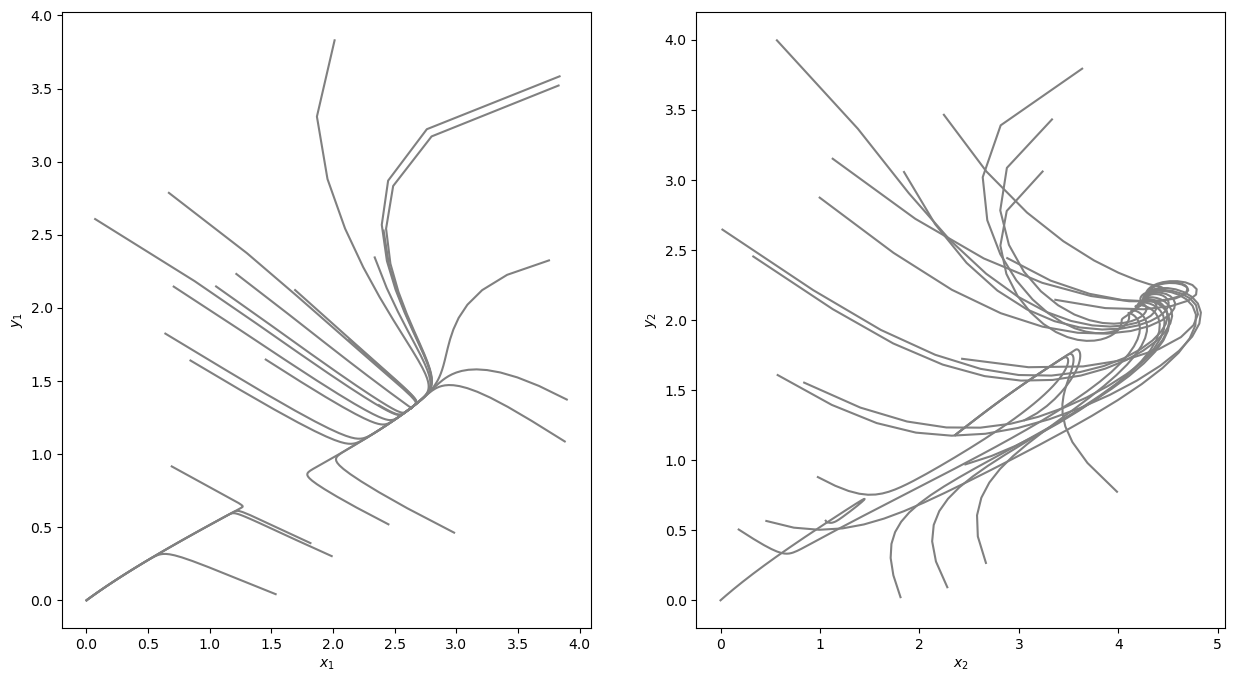

(Figure(PyObject <Figure size 1500x800 with 2 Axes>), PyObject[PyObject <Axes: xlabel='$x_{1}$', ylabel='$y_{1}$'> PyObject <Axes: xlabel='$x_{2}$', ylabel='$y_{2}$'>])

In [4]:
params = Dict{Symbol,Any}(
        :ρ  => 4.2, 
        :f  => 1.0,
        :α₀ => -1.0, 
        :w₀ =>  1.0,
        :a₁ => 1.0, 
        :h  => 2.0, 
        :a₂ => 0.0, 
        :d  => [42], 
        :l  => 600.0, 
        :P₀ => 1.0, 
        :β₁ => 0.0, 
        :β₂ => 1.0,
        :n  => 2,
        :ecosystems_to_deforest => [])

fig, axs = phase_portrait(
    50,
    params;
    nrows=1,
    ncols=2,
    figsize=(15,8))